In [57]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moviedata/sample_submission.csv
/kaggle/input/moviedata/movies.csv
/kaggle/input/moviedata/imdb_data.csv
/kaggle/input/moviedata/genome_tags.csv
/kaggle/input/moviedata/genome_scores.csv
/kaggle/input/moviedata/train.csv
/kaggle/input/moviedata/test.csv
/kaggle/input/moviedata/tags.csv
/kaggle/input/moviedata/links.csv


# CB2 Movie recommendation notebook

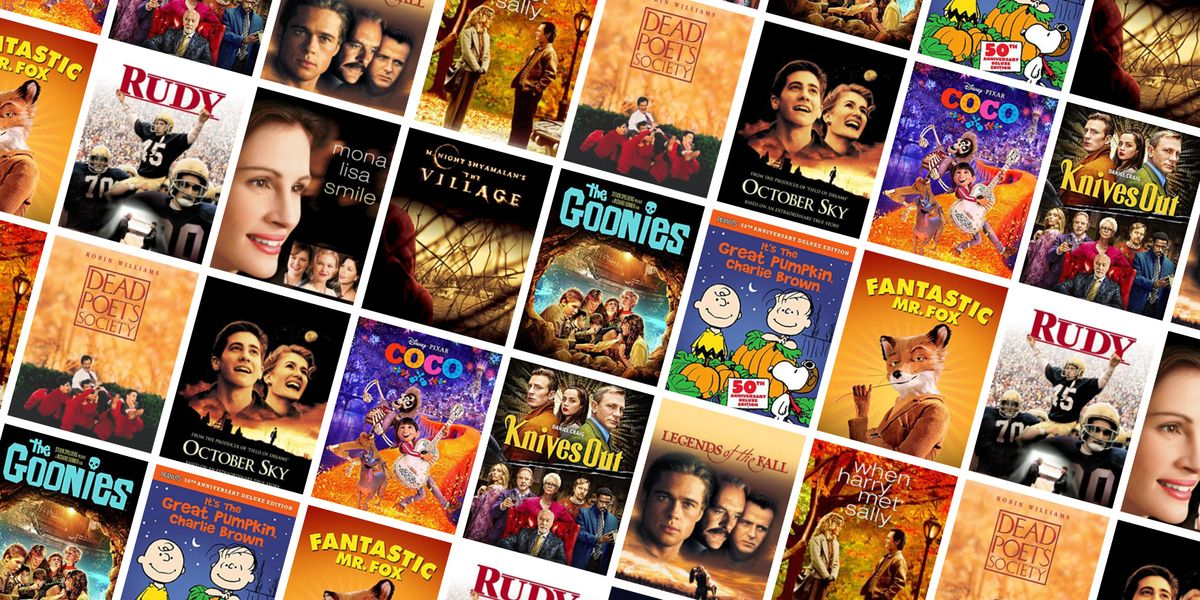

## Table of Contents

1. <a href ="#1.-Task-Description">Task Description</a>
2. <a href ="#2.-Evaluation">Evaluation</a>
3. <a href ="#3.-Comet-Experiment">Comet Experiment</a>
4. <a href ="#4.-Importing-Libraries">Importing Libraries</a>
5. <a href ="#5.-Importing-Data">Importing Data</a>
6. <a href ="#6.-Data-Overview">Data Overview</a>
7. <a href ="#7.-Exploratory-Data-Analysis"> Exploratory Data Analysis</a>
8. <a href ="#8.-Recommendation-System:-Content-Based-Filtering">Recommendation System: Content Based Filtering</a>
9. <a href ="#9.-Dimensionality-Reduction">Dimensionality Reduction</a>
10. <a href ="#10.-Collaborative-Filtering">Collaborative Filtering</a>
11. <a href ="#11.-Conclusion">Conclusion</a>
12. <a href ="#12.-Submission">Submission</a>

## 1. Task Description
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, the client has tasked us to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

## 2. Evaluation


The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error (RMSE) is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. For our task of generating user movie ratings via recommendation algorithms, the the formula is given by:
                                           

## 3. Comet

In [58]:

'''            


!pip install comet_ml
# point comet_ml SDK to www.comet.com installation
import os
os.environ["COMET_URL_OVERRIDE"] = "https://www.comet.com/clientlib/"

# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="h3bQ9KYqt3r8nf4Y9oerJWCNn",
    project_name="cb2-movie-classifier",
    workspace="vicariousvision",
)


'''
# Run your code and go to /""


'            \n\n\n!pip install comet_ml\n# point comet_ml SDK to www.comet.com installation\nimport os\nos.environ["COMET_URL_OVERRIDE"] = "https://www.comet.com/clientlib/"\n\n# Import comet_ml at the top of your file\nfrom comet_ml import Experiment\n\n# Create an experiment with your api key\nexperiment = Experiment(\n    api_key="h3bQ9KYqt3r8nf4Y9oerJWCNn",\n    project_name="cb2-movie-classifier",\n    workspace="vicariousvision",\n)\n\n\n'

## 4. Importing Libraries

In [59]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from sklearn.neighbors import  NearestNeighbors
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import cufflinks as cf

# Packages for Randomisation
import random


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud


## 5. Importing Data

In [60]:
#Movies dataframe
df_movies = pd.read_csv('../input/moviedata/movies.csv')

#sample submission
df_sample = pd.read_csv('../input/moviedata/sample_submission.csv')

#Genome_scores dataframe
df_gesc = pd.read_csv('../input/moviedata/genome_scores.csv')

#links dataframe
df_links = pd.read_csv('../input/moviedata/links.csv')

#Genome_tags dataframe
df_getg = pd.read_csv('../input/moviedata/genome_tags.csv')

#imbd dataframe
df_imdb = pd.read_csv('../input/moviedata/imdb_data.csv')

#tags dataframe
df_tags = pd.read_csv('../input/moviedata/tags.csv')

#train dataframe
df_train = pd.read_csv('../input/moviedata/train.csv')

#test dataframe 
df_test = pd.read_csv('../input/moviedata/test.csv')

## 6. Data Overview

We have been given 8 data files to work with an one sample file of what we should output. In these files are records of movie names, name of directors, cast, budget etc. 

In the data there are two rating sources that have been used, one from imDB and The Movie Database. We will try to use these rating scores in our model building.


In [61]:
df_movies.head(2) #contains movieId, title and genre

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [62]:
df_links.head(2) #links a movie with its rating from imDB and its rating from The Movie Database

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [63]:
df_tags.head(2) #User assigned for the movies within the dataset. Can be used to group simmilar users or movies

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [64]:
df_imdb.head(2) #data from the imDB. Contains movieID, cast, director, runtime, budget and key words that are associated with its plot

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


In [65]:
df_train.head(2) #the data we will be training the model on. Time stamp could be dropped from this data.

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [66]:
df_train.info() #we're working with int data types which works for the models we are using

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [81]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## 7. EDA

In [67]:
df_train["userId"].nunique()

162541

In [68]:
df_train.movieId.nunique()

48213

In [69]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
train1 = pd.DataFrame(df_train.groupby('userId')['rating'].agg('mean').reset_index())
train1_2 = pd.DataFrame(df_train.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe 
train1 = train1.merge(train1_2,on='userId',how = 'left')
# Rename the columns respectively
train1.rename(columns={'rating_x':'avg_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
train1 = train1.sort_values('number_of_movies', ascending = False)

# Show 5 observations 
train1.head()

,userId,avg_rating,number_of_movies
72314,72315,3.092380,12952
80973,80974,3.277582,3680
137292,137293,3.192168,3588
33843,33844,2.583853,3208
20054,20055,3.179016,3050


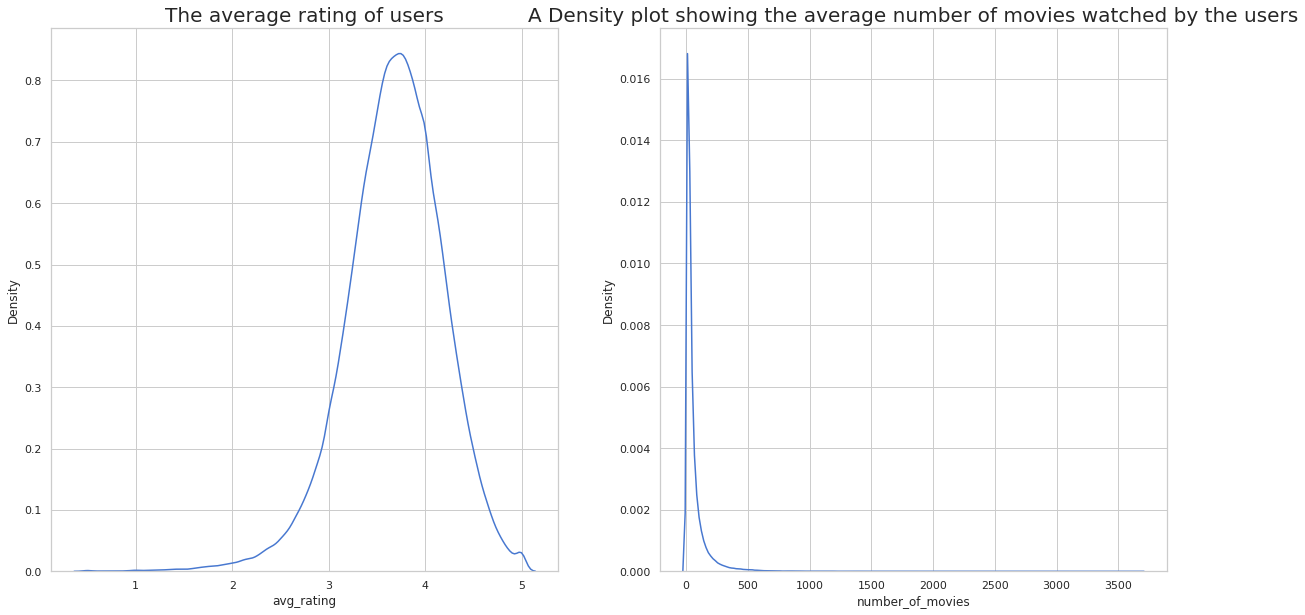

In [70]:
# Initialize the plot with set figure size
fig, ax = plt.subplots(1,2,figsize=(20, 10)) 

# Create a densityplot to visualise the density of the ratings per users
sns.kdeplot(ax=ax[0], x='avg_rating', data=train1) 
ax[0].set_title("The average rating of users",fontsize = 20)

# Set the tick labels to appear in non-scientific form
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

# Create a KDE plot of the rating the users 
sns.kdeplot(ax=ax[1], x='number_of_movies', data=train1[1:]) 
ax[1].set_title("A Density plot showing the average number of movies watched by the users",fontsize = 20)
    
# Show density plot
plt.show()

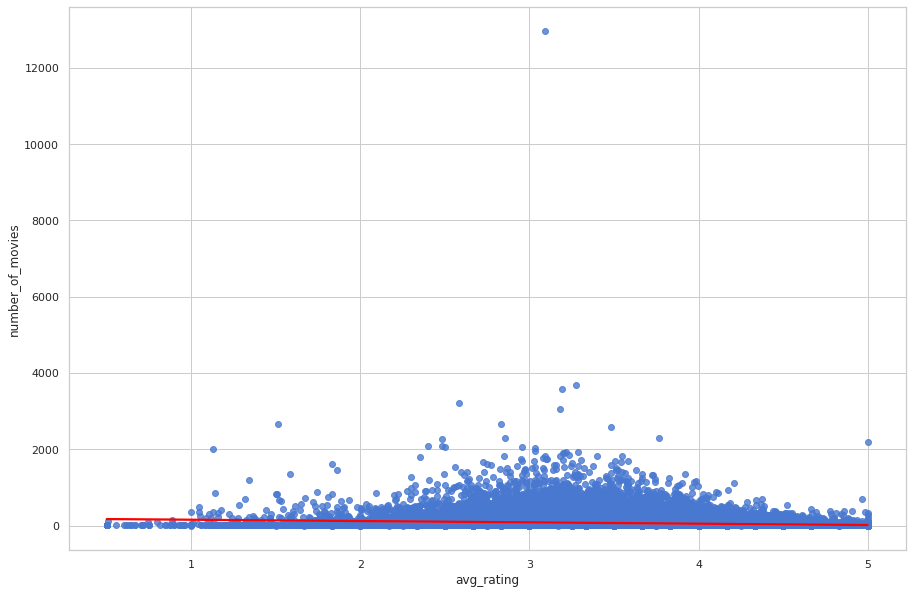

In [71]:
# Check for correlation between average rating and the number of the times have the user has watch a movie

# Create a scatter plot to visualise 
sns.regplot(data = train1, y = "number_of_movies", x = "avg_rating",line_kws={"color": "red"})

# Show the scatterplot
plt.show()

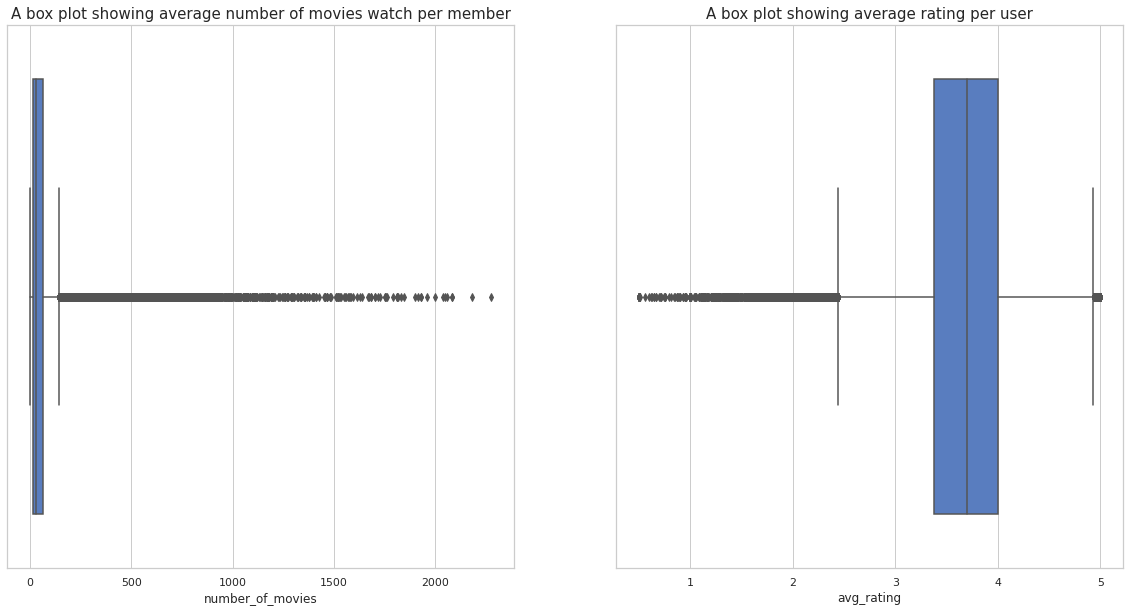

In [72]:
fig,ax = plt.subplots(1,2,figsize = (20,10))


sns.boxplot(ax =ax[0],x = train1.iloc[10:,2])

ax[0].set_title("A box plot showing average number of movies watch per member", fontsize = 15)
sns.boxplot(ax = ax[1],x = train1.iloc[10:,1] )

ax[1].set_title("A box plot showing average rating per user", fontsize = 15)
plt.show()

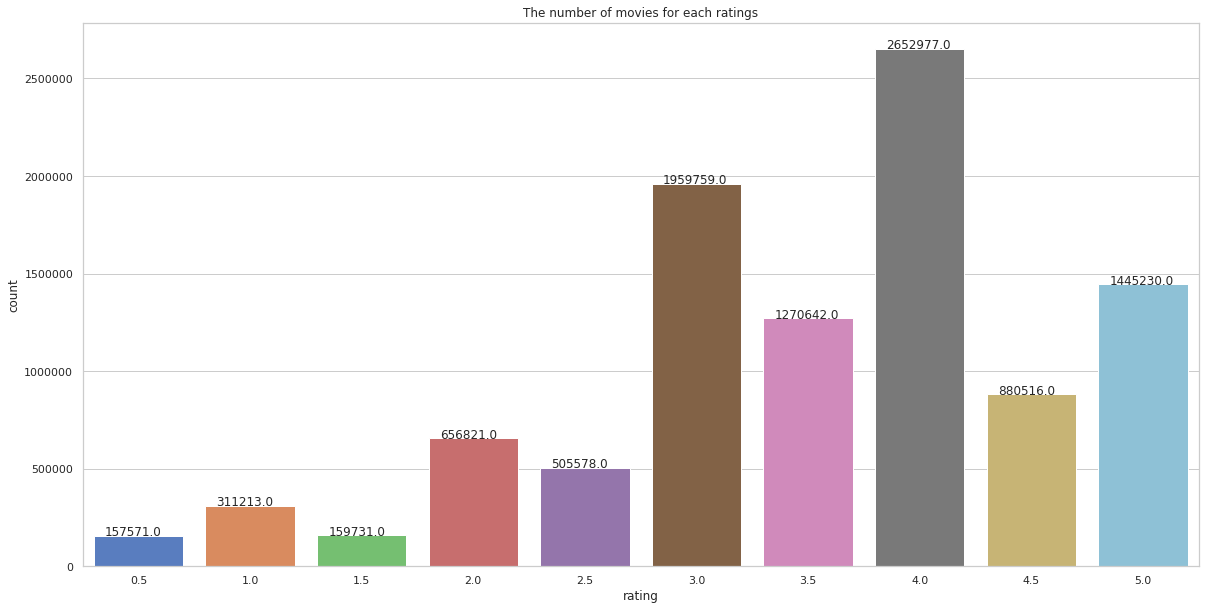

In [73]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(20, 10)) # Initialize the plot with set figure size

sns.countplot(ax=ax, x='rating', data=df_train) # Create a countplot to visualise the number of movies per category
ax.set_title("The number of movies for each ratings")
plt.ticklabel_format(style='plain', axis='y', useOffset=False) # Set the  labels to appear in non-scientific form

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# Show the countplot
plt.show()

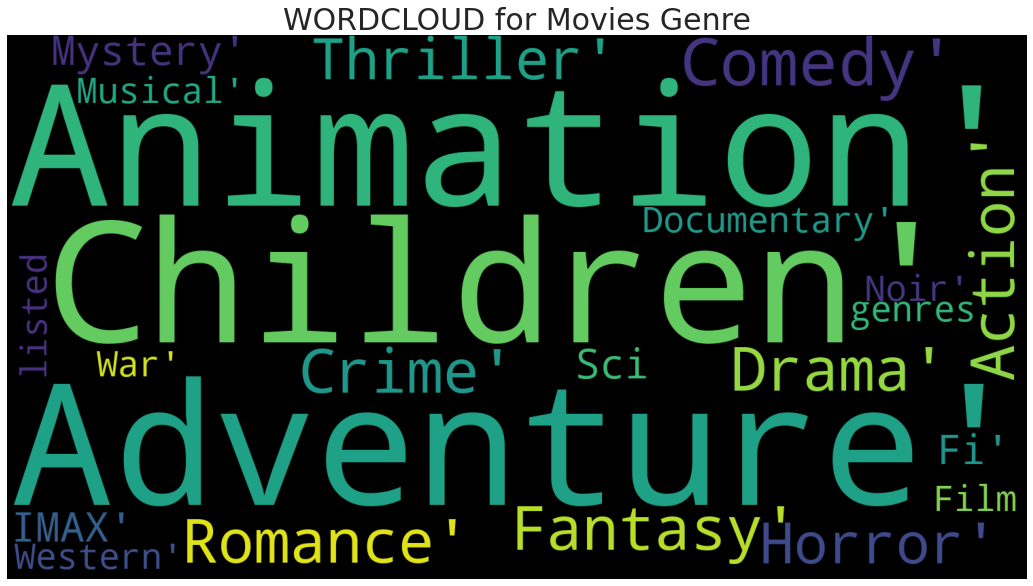

In [74]:
genres=[]
for genre in df_movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in df_movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)  

wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)



plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)



Top 10 movies

In [90]:
df_top10=pd.merge(df_train,df_movies, how='left',on='movieId')


df1=df_top10.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(10,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",145035.0
Pulp Fiction (1994),132972.0
Forrest Gump (1994),131061.0
"Silence of the Lambs, The (1991)",122021.0
"Matrix, The (1999)",120531.5


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

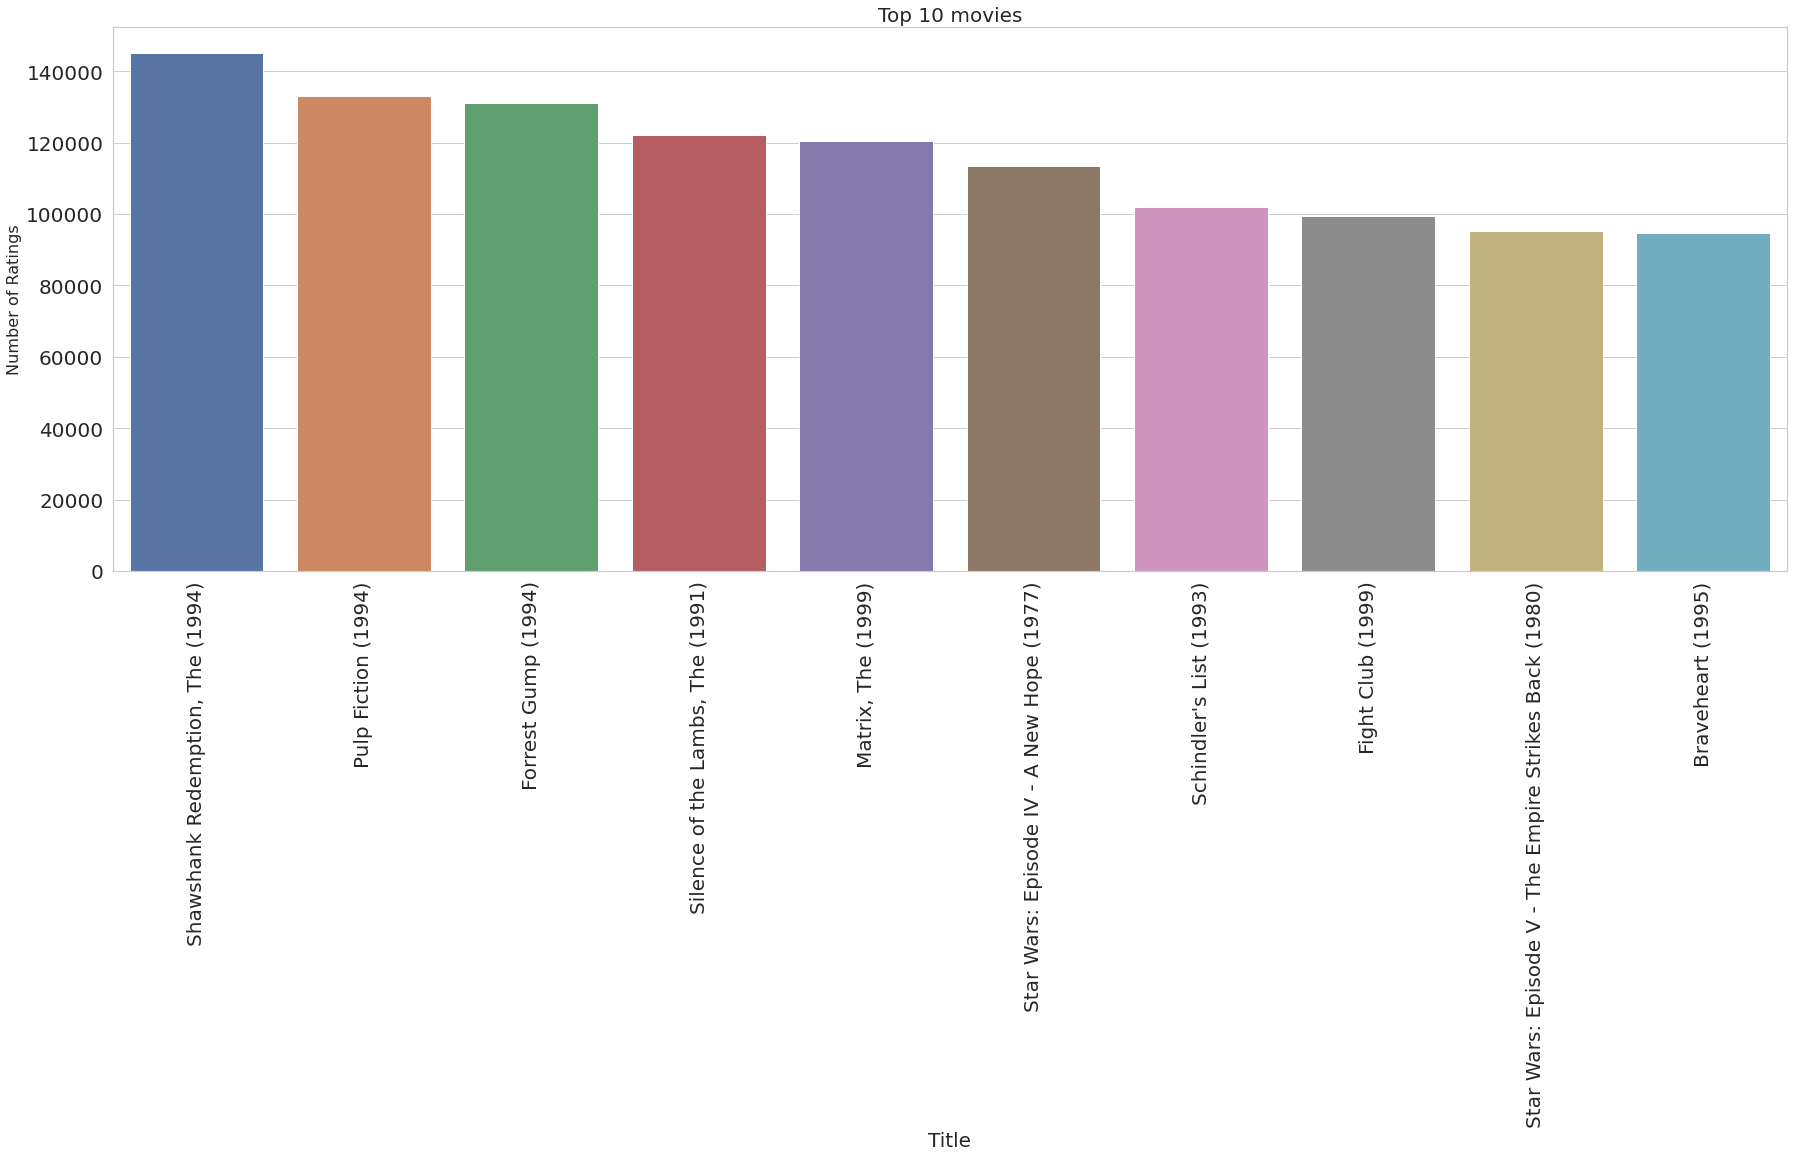

In [135]:
sns.set_theme(style="whitegrid")
ax=sns.barplot(x=high_rated.index, y=high_rated['rating'], data=high_rated)
ax.figure.set_size_inches(30,10)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xlabel('Title', fontsize=20);
plt.xticks(fontsize=20,rotation=90)

plt.ylabel('Number of Ratings', fontsize=16);
plt.title('Top 10 movies', fontsize=20)
plt.yticks(fontsize=20)

